# Residual study

In [6]:
%run pylib/tools dark
from importlib import reload
from pylib import kerr_funcs; reload(kerr_funcs)
from pylib.kerr_funcs import *
self = KerrModel()

NameError: name 'nside' is not defined

In [4]:
from astropy.coordinates import SkyCoord, Angle
b = self(3,0); print(b)
center = SkyCoord(l=0.5, b=0.7, frame='galactic', unit='deg')
# %time mask1 = b.cone_search(center, radius=5.0)
from astropy_healpix import HEALPix 

hp = HEALPix(b.nside, frame='galactic',order='nested')
sc = hp.healpix_to_skycoord(b.pix)
%time mask2 = b.cone_search(center, radius=5.0)
# print(np.all(mask1 == mask2))
# for m in [mask1, mask2]:
#     print(len(m), np.sum(m))    


Band(3, 0): psf3@0.13 GeV nside 16 occ 1.000
CPU times: user 1.12 ms, sys: 0 ns, total: 1.12 ms
Wall time: 1.16 ms


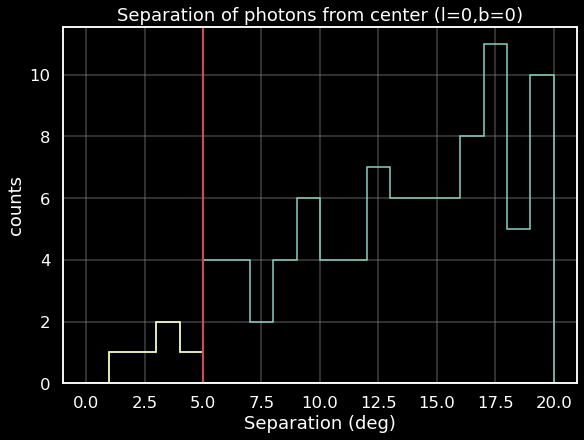

In [5]:
sep = sc.separation(center).degree
plt.figure(figsize=(8,6))
plt.hist(sep, bins=(bins:=np.linspace(0, 20, 21)), histtype='step', cumulative=False)
plt.hist(sep[mask2], bins=bins, histtype='step', cumulative=False)
plt.axvline(5.0, color='r')
plt.xlabel('Separation (deg)')
plt.ylabel('counts')
plt.title('Separation of photons from center (l=0,b=0)')
plt.show()

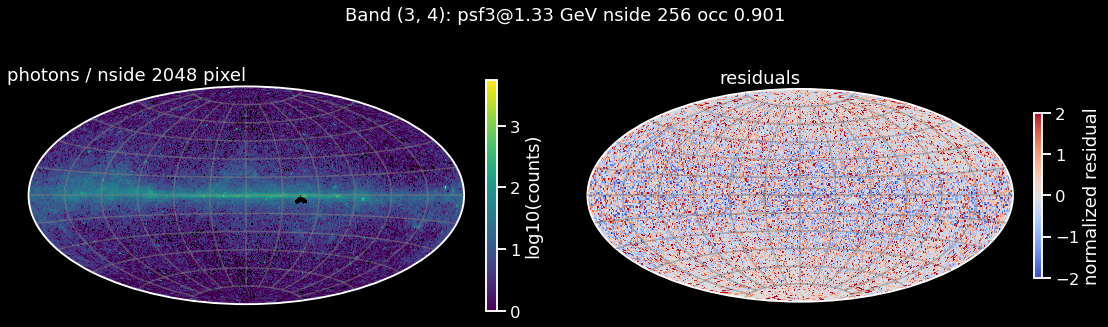

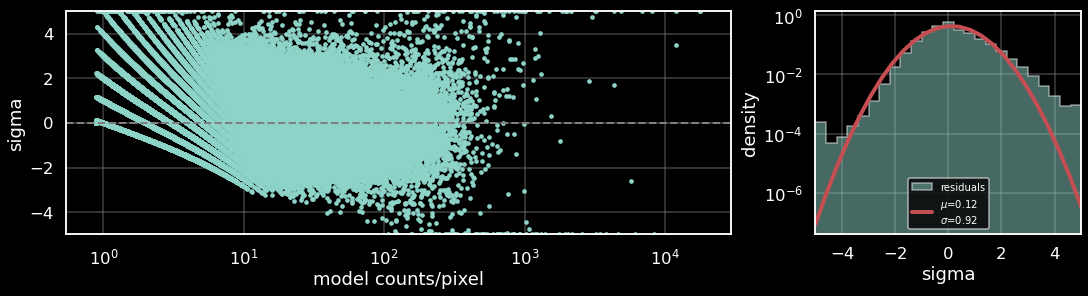

0.006657876458111334

In [6]:
rp = ResidualPlotter(self(3,4), 2048)
rp.plots()
sum(rp.photons)/sum(rp.model) -1

In [7]:
from scipy.stats import norm, poisson
if False:
    z = [poisson(m).cdf(p) for m,p in zip(rp.model, rp.photons)]
    plt.hist(z, bins=np.linspace(0,1,100), histtype='step', log=True);
    plt.scatter(rp.model, rp.photons, s=1);
    plt.xscale('log')
    plt.yscale('log')
    plt.scatter(rp.model, z, s=1);
    plt.xscale('log')  

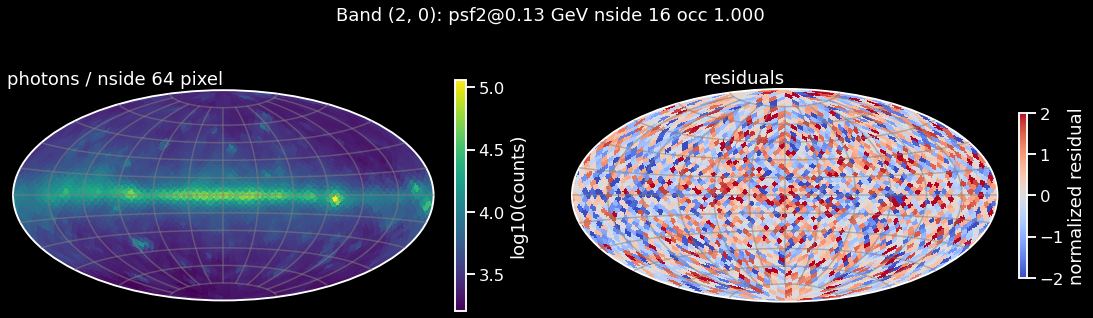

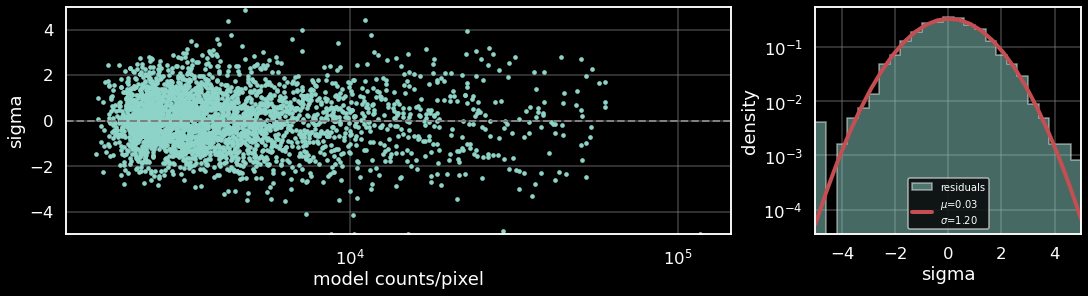

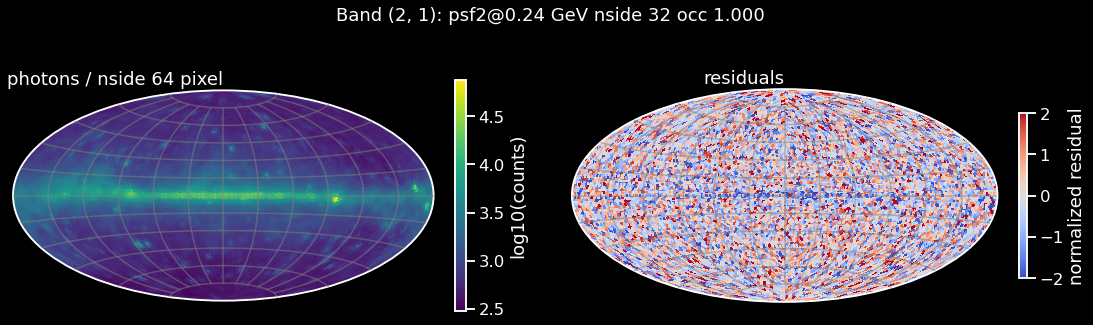

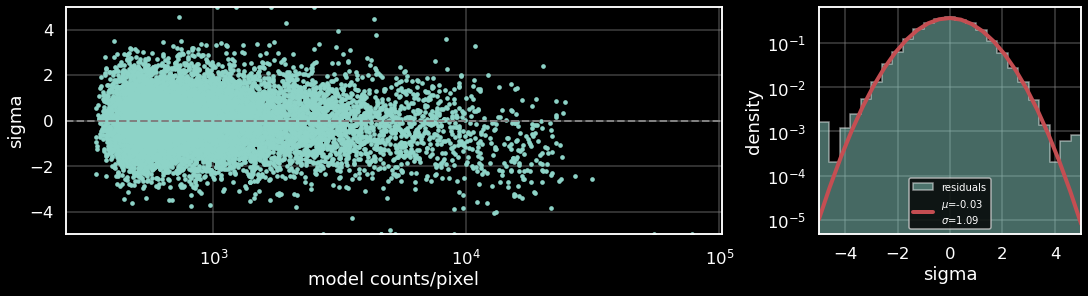

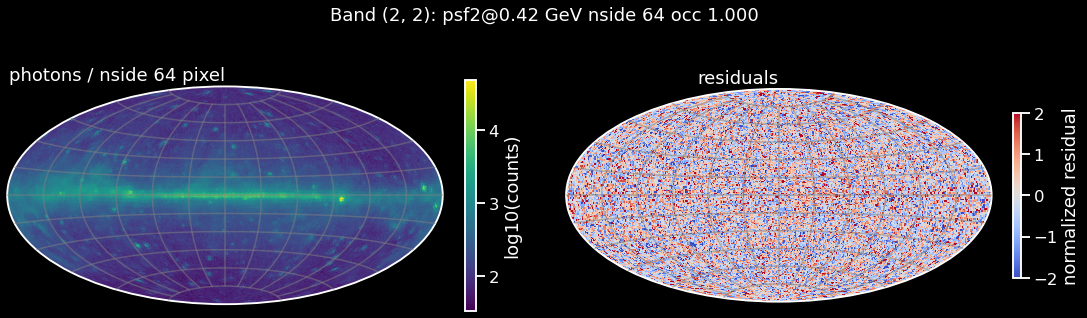

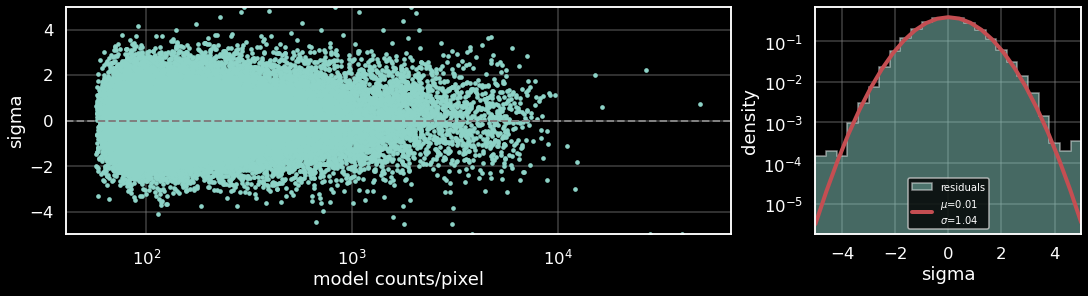

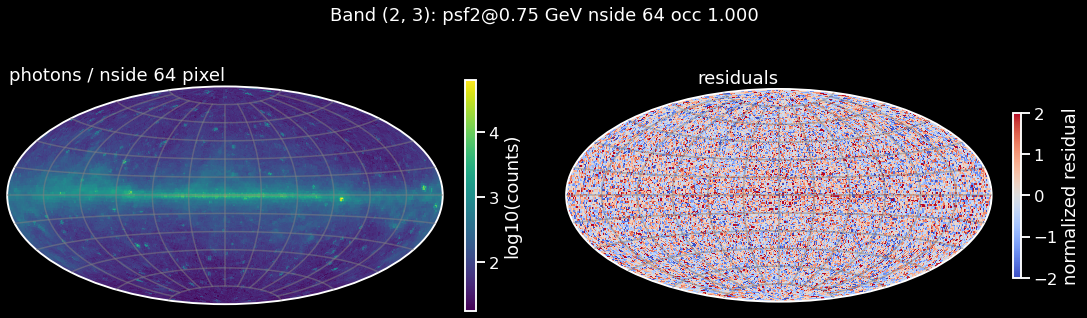

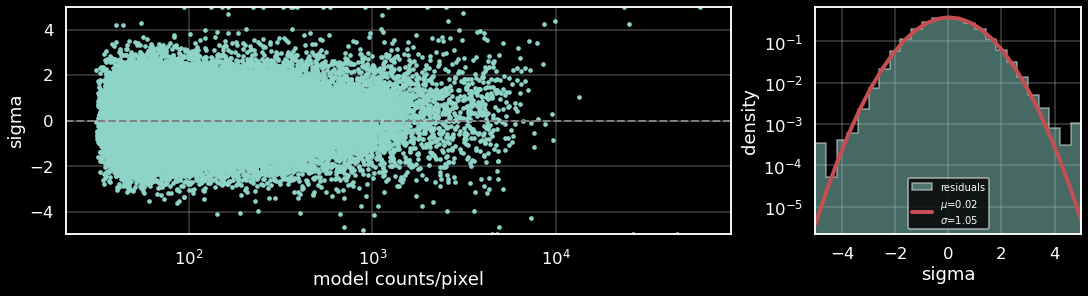

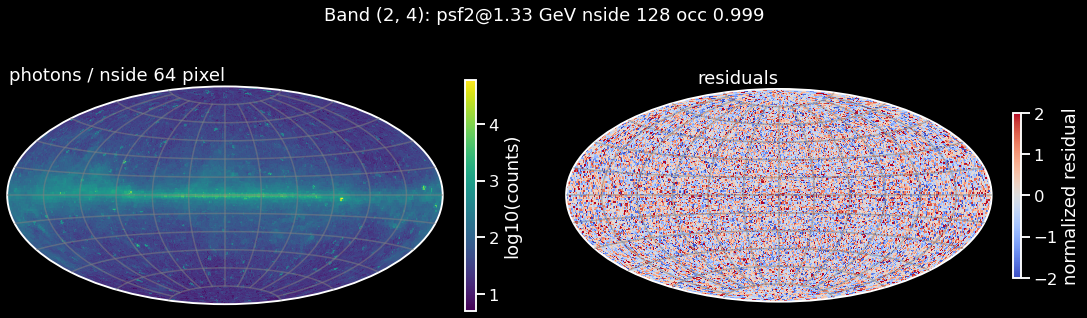

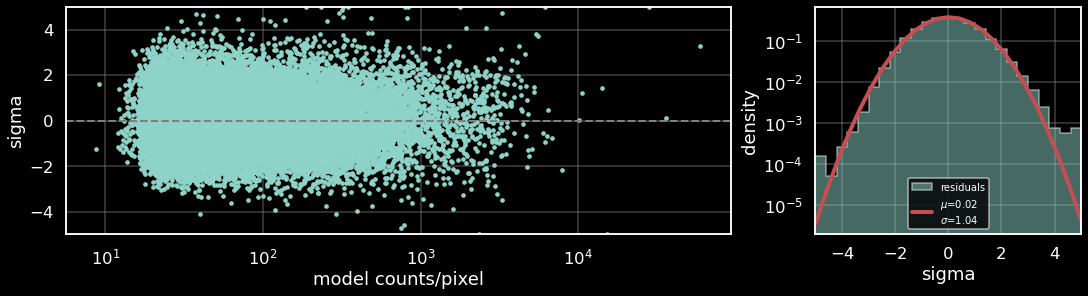

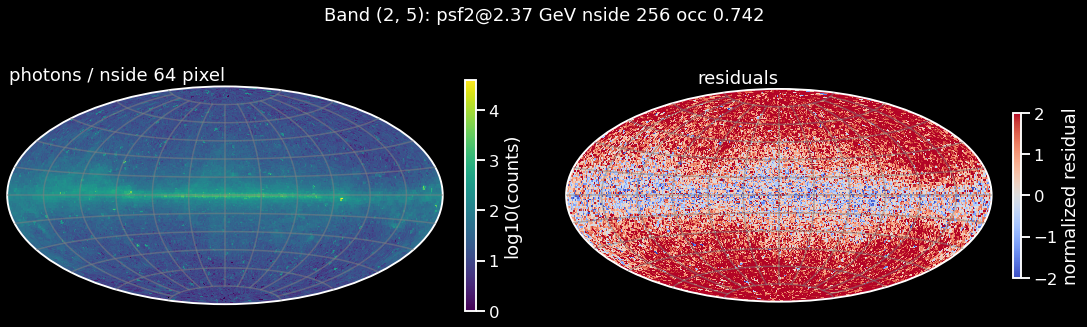

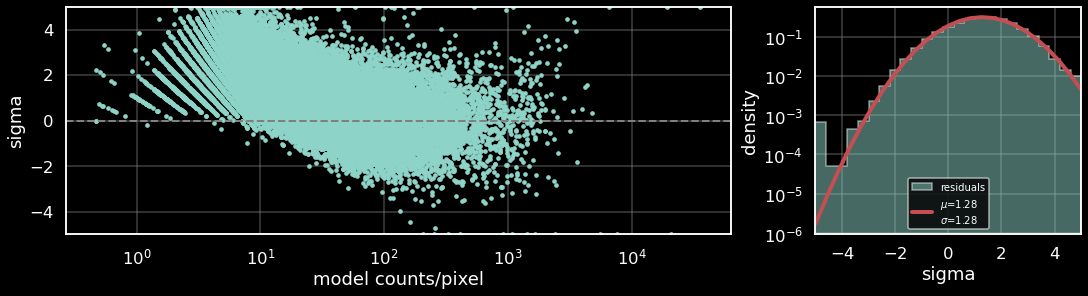

In [8]:
for i in range(0,6):
    ResidualPlotter(self(2,i), 64).plots()

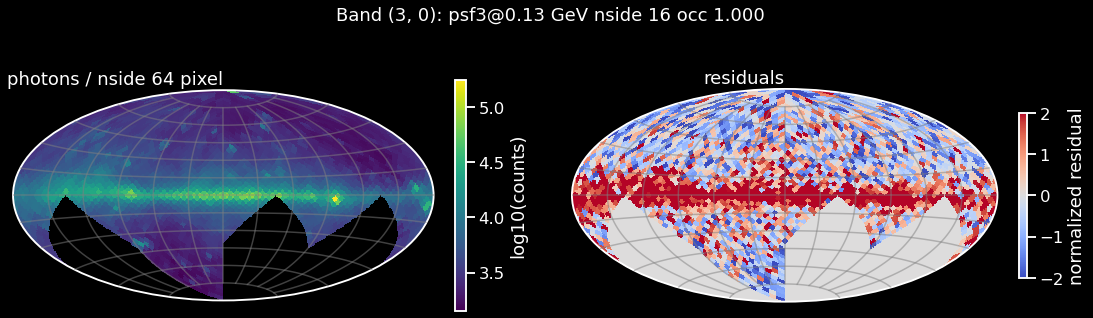

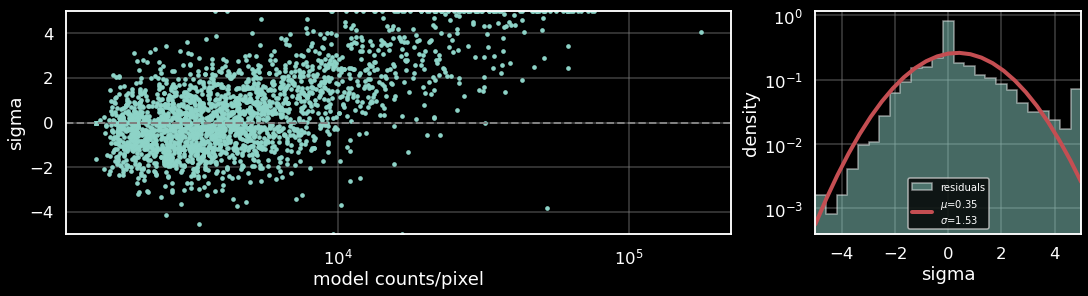

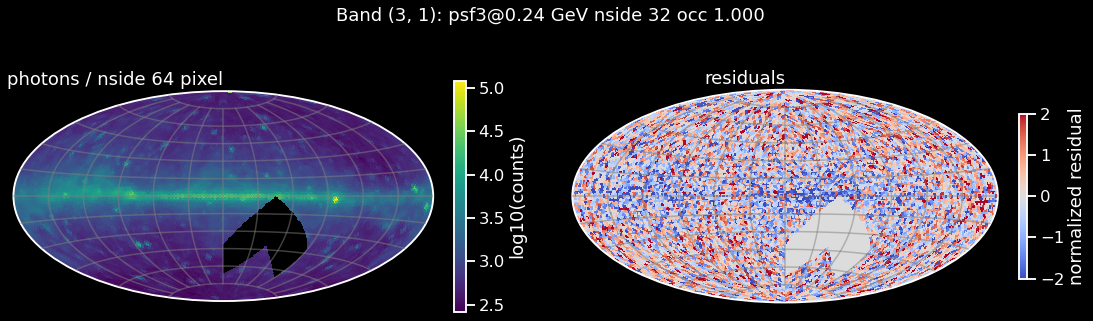

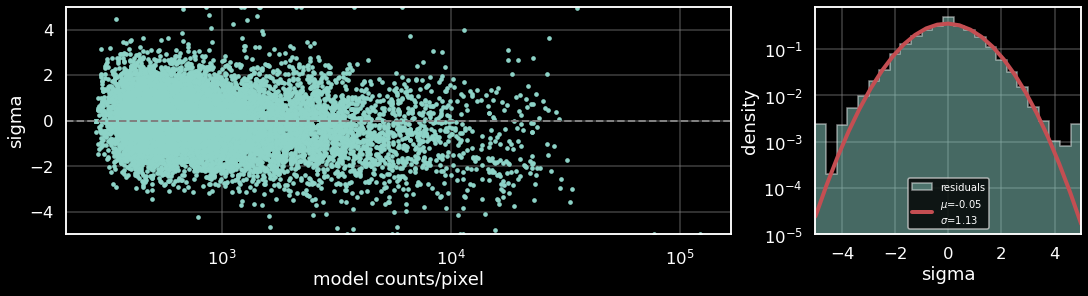

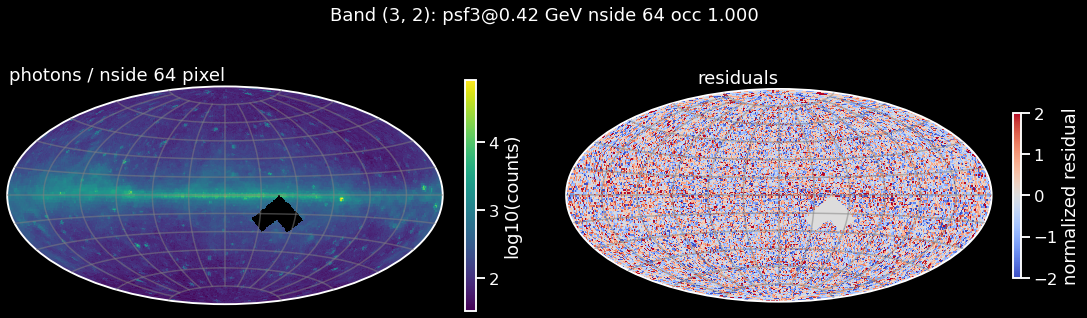

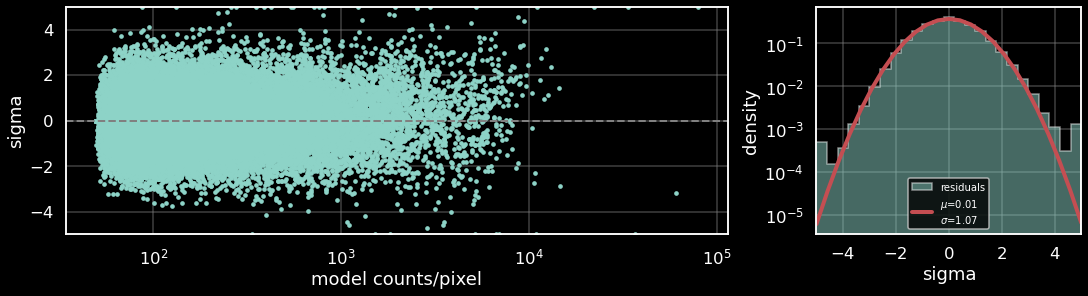

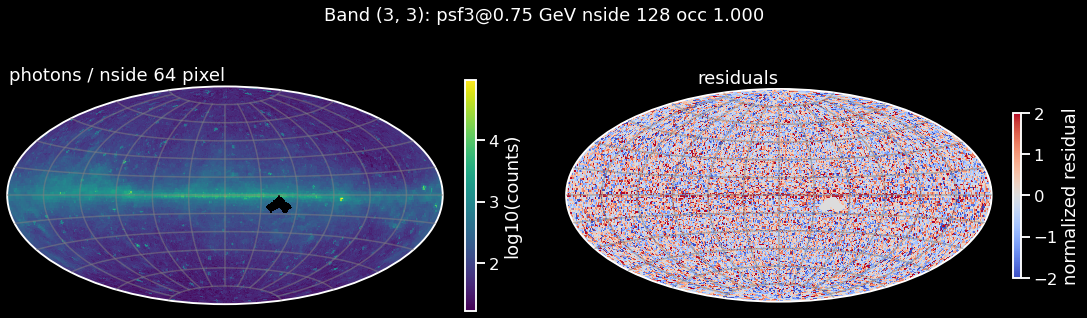

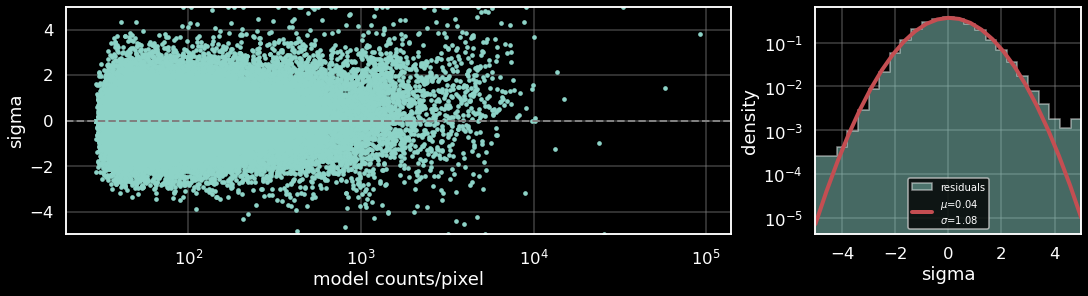

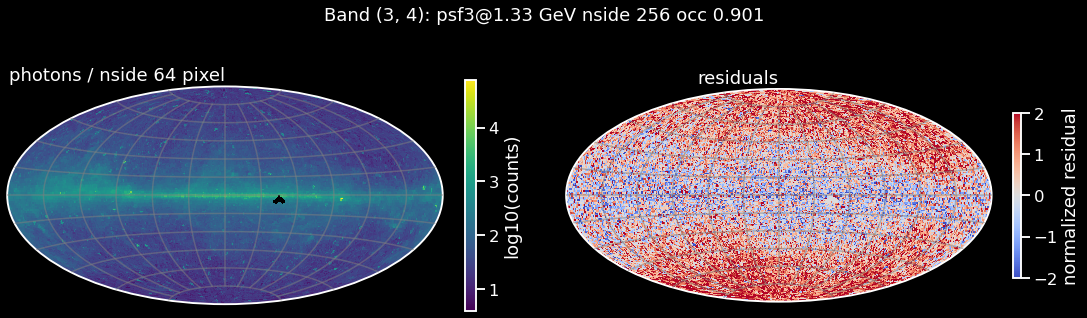

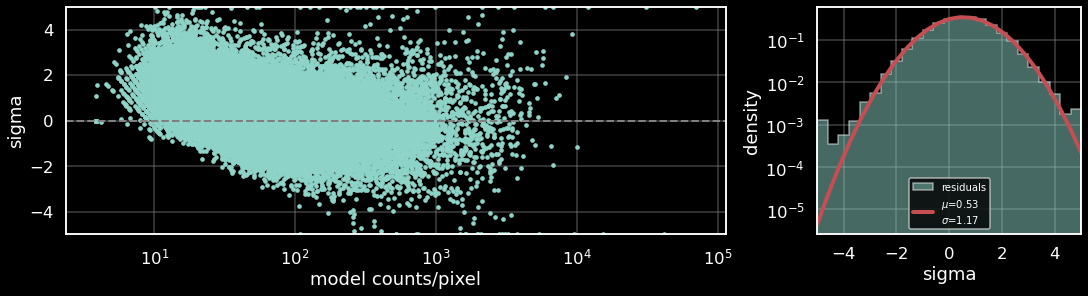

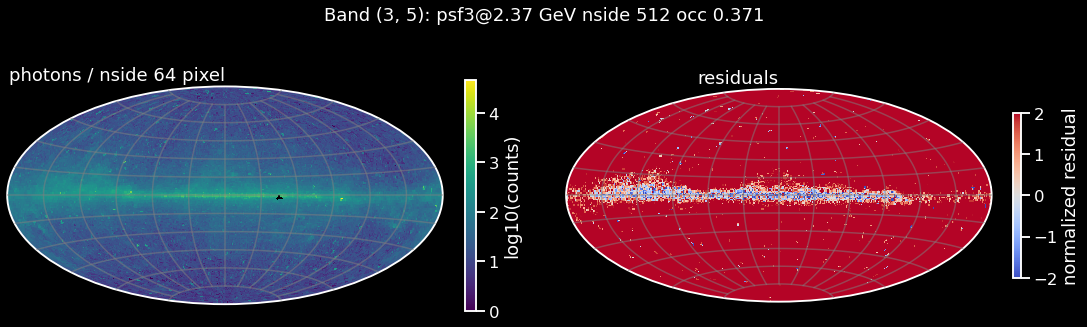

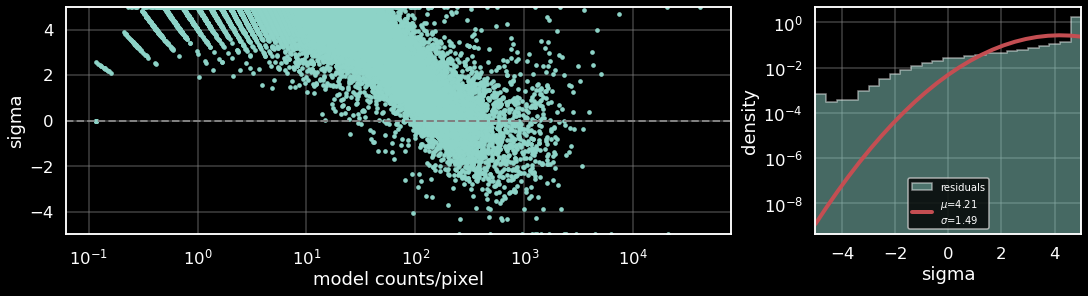

In [9]:
for i in range(0,6):
    ResidualPlotter(self(3,i)).plots()

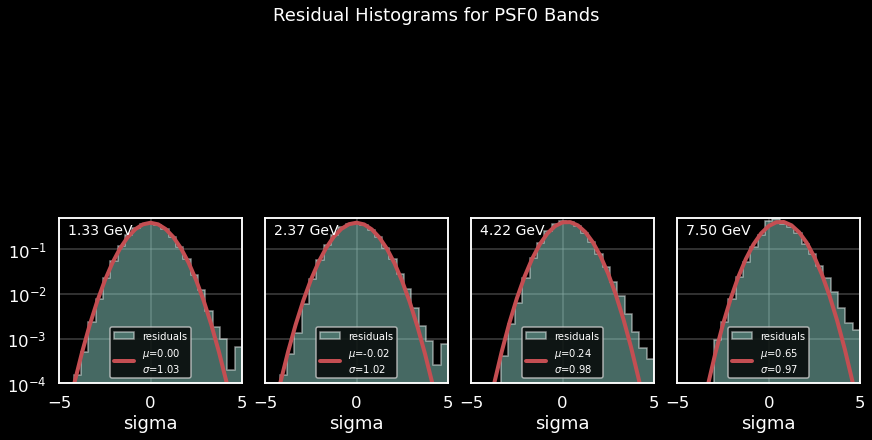

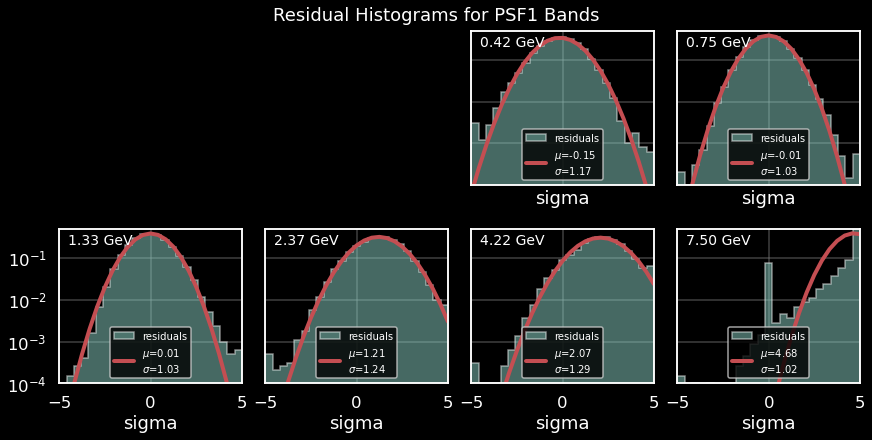

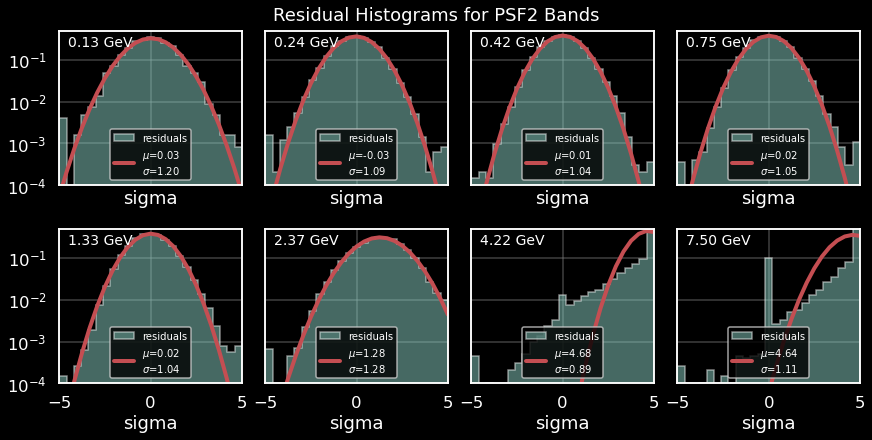

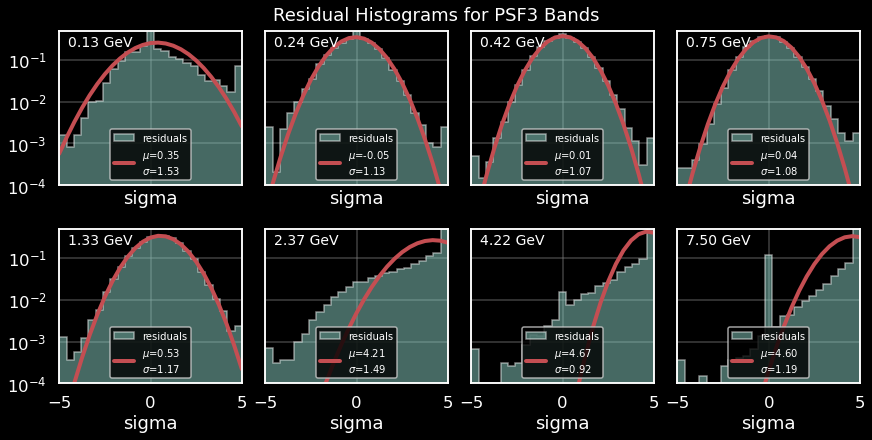

In [10]:
for ipsf in range(4):
    plot_residual_histograms(self, ipsf)